In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [39]:
import pandas as pd

df = pd.read_excel(r"C:\ML\final\breach_report.xls")
df.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Individuals Affected', 'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description'],
      dtype='object')

In [40]:
df

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Adventist HealthCare,MD,Healthcare Provider,1300,11/13/2025,Loss,Paper/Films,Yes,NaN
1,Synergy Advanced Healthcare LLC,CT,Healthcare Provider,1260,11/04/2025,Unauthorized Access/Disclosure,Electronic Medical Record,No,NaN
2,Saint Mary’s Home of Erie,PA,Healthcare Provider,501,10/24/2025,Hacking/IT Incident,Network Server,No,NaN
3,Conduent Business Services LLC,NJ,Business Associate,42616,10/08/2025,Hacking/IT Incident,Network Server,Yes,NaN
4,"Revere Health, PC",UT,Healthcare Provider,10800,10/02/2025,Hacking/IT Incident,Network Server,No,NaN
...,...,...,...,...,...,...,...,...,...
734,Premier Health Partners and wholly owned cover...,OH,Healthcare Provider,10833,10/12/2023,Hacking/IT Incident,Network Server,No,NaN
735,"Aspen Dental Management, Inc.",NY,Business Associate,62183,08/18/2023,Hacking/IT Incident,Network Server,Yes,NaN
736,"TAG Urgent Care Support Services, LLC",NY,Business Associate,516985,08/18/2023,Hacking/IT Incident,Network Server,Yes,NaN
737,"ProSmile Holdings, LLC",NJ,Business Associate,39674,03/28/2023,Hacking/IT Incident,Email,Yes,NaN


**Cleaning**

In [41]:
df.drop('Web Description', axis=1, inplace=True)
df = df.dropna(axis=1, how='all')
for col in df.columns:
  df[col] = df[col].astype(str).replace({'$': '', ',': '', '-': '', '—': ''}, regex=True)
df

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
0,Adventist HealthCare,MD,Healthcare Provider,1300,11/13/2025,Loss,Paper/Films,Yes
1,Synergy Advanced Healthcare LLC,CT,Healthcare Provider,1260,11/04/2025,Unauthorized Access/Disclosure,Electronic Medical Record,No
2,Saint Mary’s Home of Erie,PA,Healthcare Provider,501,10/24/2025,Hacking/IT Incident,Network Server,No
3,Conduent Business Services LLC,NJ,Business Associate,42616,10/08/2025,Hacking/IT Incident,Network Server,Yes
4,Revere Health PC,UT,Healthcare Provider,10800,10/02/2025,Hacking/IT Incident,Network Server,No
...,...,...,...,...,...,...,...,...
734,Premier Health Partners and wholly owned cover...,OH,Healthcare Provider,10833,10/12/2023,Hacking/IT Incident,Network Server,No
735,Aspen Dental Management Inc.,NY,Business Associate,62183,08/18/2023,Hacking/IT Incident,Network Server,Yes
736,TAG Urgent Care Support Services LLC,NY,Business Associate,516985,08/18/2023,Hacking/IT Incident,Network Server,Yes
737,ProSmile Holdings LLC,NJ,Business Associate,39674,03/28/2023,Hacking/IT Incident,Email,Yes


In [42]:
#making columns numerical
df['Individuals Affected'] = pd.to_numeric(df['Individuals Affected'], errors='coerce')
df['Breach Submission Date'] = pd.to_datetime(df['Breach Submission Date'], errors='coerce')
df

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
0,Adventist HealthCare,MD,Healthcare Provider,1300,2025-11-13,Loss,Paper/Films,Yes
1,Synergy Advanced Healthcare LLC,CT,Healthcare Provider,1260,2025-11-04,Unauthorized Access/Disclosure,Electronic Medical Record,No
2,Saint Mary’s Home of Erie,PA,Healthcare Provider,501,2025-10-24,Hacking/IT Incident,Network Server,No
3,Conduent Business Services LLC,NJ,Business Associate,42616,2025-10-08,Hacking/IT Incident,Network Server,Yes
4,Revere Health PC,UT,Healthcare Provider,10800,2025-10-02,Hacking/IT Incident,Network Server,No
...,...,...,...,...,...,...,...,...
734,Premier Health Partners and wholly owned cover...,OH,Healthcare Provider,10833,2023-10-12,Hacking/IT Incident,Network Server,No
735,Aspen Dental Management Inc.,NY,Business Associate,62183,2023-08-18,Hacking/IT Incident,Network Server,Yes
736,TAG Urgent Care Support Services LLC,NY,Business Associate,516985,2023-08-18,Hacking/IT Incident,Network Server,Yes
737,ProSmile Holdings LLC,NJ,Business Associate,39674,2023-03-28,Hacking/IT Incident,Email,Yes


**Encoding**

In [43]:
#Business associate, type of breach to binary
#Label encoding: State, covered entity type, location of breach information

encoder = LabelEncoder()
df['Location of Breached Information Encoded'] = encoder.fit_transform(df['Location of Breached Information'])
df['State Encoded'] = encoder.fit_transform(df['State'])
df['Covered Entity Type Encoded'] = encoder.fit_transform(df['Covered Entity Type'])

if 'Business Associate Present' in df.columns:
  df['Business Associate Present'] = df['Business Associate Present'].map({'Yes': 1, 'No': 0})
if 'Type of Breach' in df.columns:
  df['Type of Breach'] = df['Type of Breach'].map({'Hacking/IT Incident': 1, 'Unauthorized Access/Disclosure': 0})

df['Breach Submission Date'] = pd.to_datetime(df['Breach Submission Date'], errors='coerce')

# Create useful date features
df['Breach_Year'] = df['Breach Submission Date'].dt.year
df['Breach_Month'] = df['Breach Submission Date'].dt.month
df['Breach_Day'] = df['Breach Submission Date'].dt.day
df['Breach_DayOfWeek'] = df['Breach Submission Date'].dt.dayofweek

# Drop original date column (optional, ML cannot use datetime dtype directly)
df.drop('Breach Submission Date', axis=1, inplace=True)
df = df.dropna(axis=0, how='any')

df

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present,Location of Breached Information Encoded,State Encoded,Covered Entity Type Encoded,Breach_Year,Breach_Month,Breach_Day,Breach_DayOfWeek
1,Synergy Advanced Healthcare LLC,CT,Healthcare Provider,1260,0.0,Electronic Medical Record,0,6,6,3,2025,11,4,1
2,Saint Mary’s Home of Erie,PA,Healthcare Provider,501,1.0,Network Server,0,18,37,3,2025,10,24,4
3,Conduent Business Services LLC,NJ,Business Associate,42616,1.0,Network Server,1,18,30,0,2025,10,8,2
4,Revere Health PC,UT,Healthcare Provider,10800,1.0,Network Server,0,18,43,3,2025,10,2,3
5,Innovative Physical Therapy,IL,Healthcare Provider,2023,1.0,Email,1,11,13,3,2025,10,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Premier Health Partners and wholly owned cover...,OH,Healthcare Provider,10833,1.0,Network Server,0,18,34,3,2023,10,12,3
735,Aspen Dental Management Inc.,NY,Business Associate,62183,1.0,Network Server,1,18,33,0,2023,8,18,4
736,TAG Urgent Care Support Services LLC,NY,Business Associate,516985,1.0,Network Server,1,18,33,0,2023,8,18,4
737,ProSmile Holdings LLC,NJ,Business Associate,39674,1.0,Email,1,11,30,0,2023,3,28,1


Random Forest Tree 
* Split

Vanilla Random Forest Accuracy: 0.8956043956043956
              precision    recall  f1-score   support

         0.0       0.83      0.37      0.51        27
         1.0       0.90      0.99      0.94       155

    accuracy                           0.90       182
   macro avg       0.87      0.68      0.73       182
weighted avg       0.89      0.90      0.88       182



C:\Users\crazy\AppData\Local\Temp\ipykernel_15960\3376958365.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


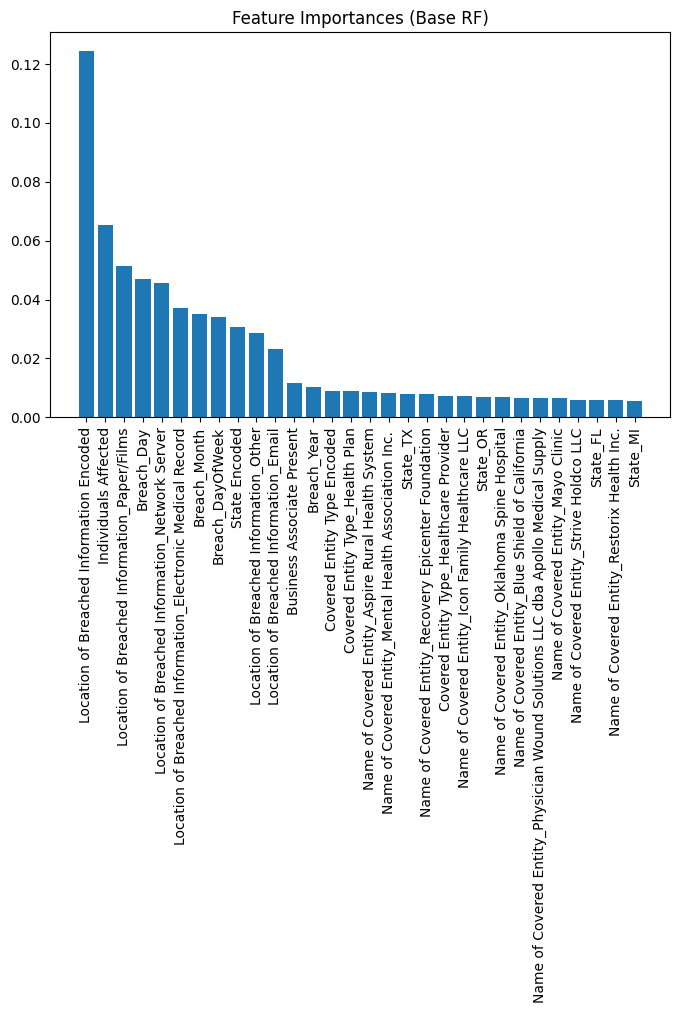

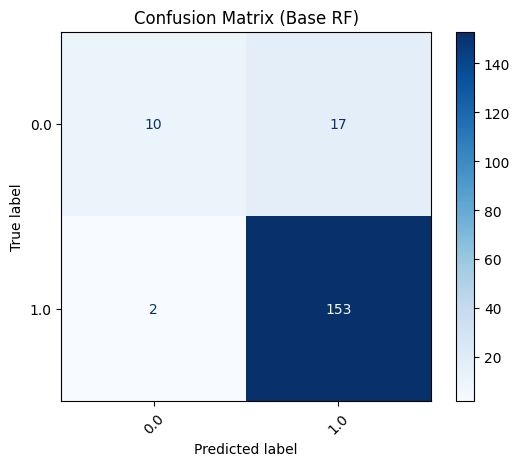

In [45]:
X = df.drop('Type of Breach', axis=1)
y = df['Type of Breach']

# Convert categorical columns into numeric dummy variables
X = pd.get_dummies(X, drop_first=True)  # prevents duplicate column issues

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Print results
print("Vanilla Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 30  # only show top 5
plt.figure(figsize=(8,5))
plt.title("Feature Importances (Base RF)")
plt.bar(range(top_n), importances[indices][:top_n])
plt.xticks(range(top_n), X.columns[indices][:top_n], rotation=90)
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (Base RF)")
plt.show()

Tuned 

Best params: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8901

              precision    recall  f1-score   support

         0.0       0.89      0.30      0.44        27
         1.0       0.89      0.99      0.94       155

    accuracy                           0.89       182
   macro avg       0.89      0.64      0.69       182
weighted avg       0.89      0.89      0.87       182



C:\Users\crazy\AppData\Local\Temp\ipykernel_15960\84283332.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


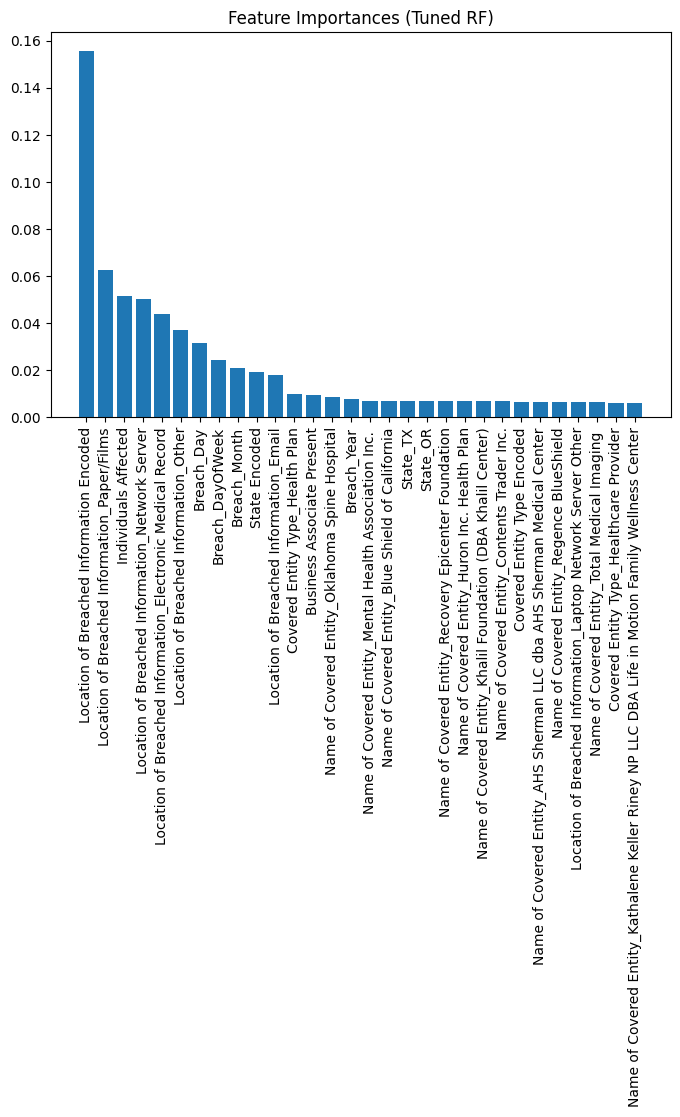

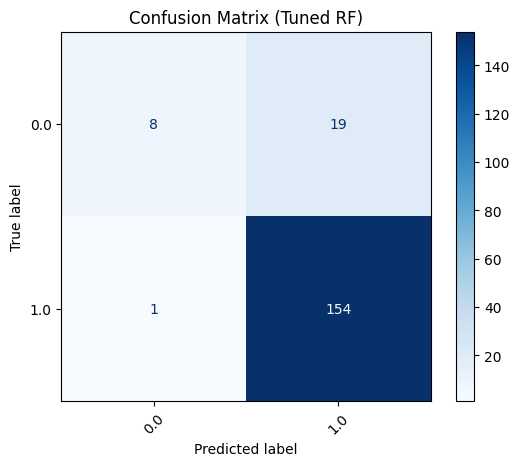

In [46]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [8, 12, 16],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(f"Best params: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n" + classification_report(y_test, y_pred))

# Feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1][:top_n]

plt.figure(figsize=(8, 5))
plt.title("Feature Importances (Tuned RF)")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

cm_tuned = confusion_matrix(y_test, y_pred)
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=best_rf.classes_)
disp_tuned.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (Tuned RF)")
plt.show()